### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

##### I like to dissect my data with unique(), nunique(), and groupby()

In [4]:
#data["coupon"].unique()
#['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']

#data["destination"].unique()
#['No Urgent Place', 'Home', 'Work']

#data["toCoupon_GEQ min"].unique()
#[0, 1]

#data["income"].unique()
#['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
# '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
# '$100000 or More', '$87500 - $99999', 'Less than $12500']


# CarryAway [nan, '4~8', '1~3', 'gt8', 'less1', 'never']
# Bar ['never', 'less1', '1~3', 'gt8', nan, '4~8']


#toCoupon_GEQmin = data.groupby(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'])[['Y']].count()
#toCoupon_GEQmin

#data["temperature"].unique()
#[55, 80, 30]


#data[""].unique()

#data["age"].unique()
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']

#data["car"].unique()
#[nan, 'Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive', 'Car that is too old to install Onstar :D']


3. Decide what to do about your missing data -- drop, replace, other...

###### the car and age columns appear to have unusuable data
###### I will keep those values until I work on the assignment a little bit
###### and find a reason to update them

###### the car column contains nan
###### this is a problem further in the assignment because without it the count = 0
###### let's replace NoN with "four-wheels" and see what happens

In [18]:
data["car"] = data["car"].fillna("four-wheels")
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].fillna("whenever")
data["Restaurant20To50"] = data["Restaurant20To50"].fillna("whenever")

4. What proportion of the total observations chose to accept the coupon? 



###### create a variable to hold the count of accepted coupons and total number of coupons
#####  then divide accepted coupons by total number of coupons
##### and format the number to display a percentage

In [6]:
countYeq1 = data.query('Y == 1')['Y'].count() # 7210
countY = data['Y'].count() #12684
# 7210/12684 = 0.5684326710816777
'{:.2%}'.format(countYeq1/countY)

'56.84%'

5. Use a bar plot to visualize the `coupon` column.

##### this is easy.  use .plot(kind='bar') to produce a chart for the coupon column

<Axes: >

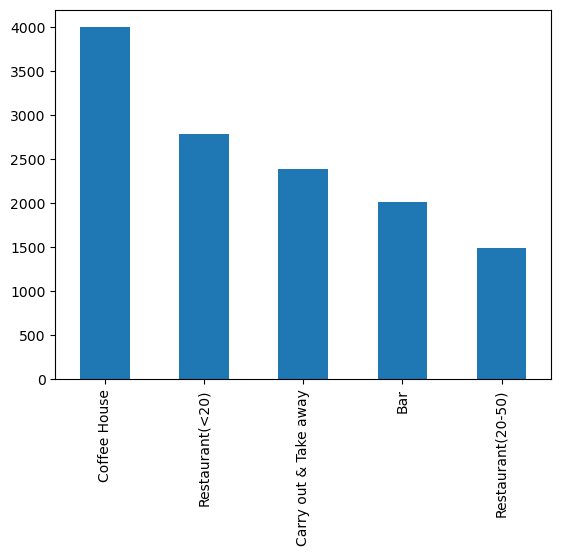

In [7]:
data["coupon"].value_counts().plot(kind='bar')

6. Use a histogram to visualize the temperature column.

##### this is easy too.  use .plot(kind='hist') to produce a chart for the temperature column
##### let's set bins=3 to make the chart easier to read

<Axes: ylabel='Frequency'>

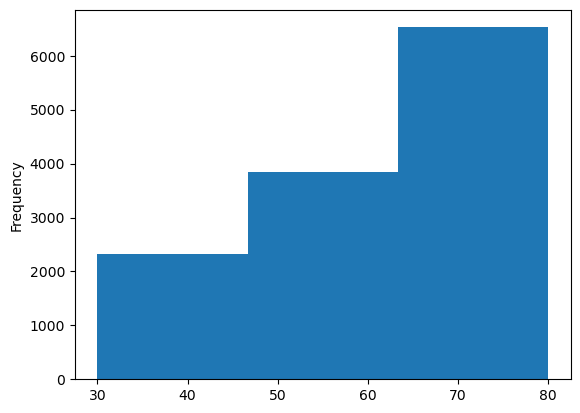

In [8]:
data["temperature"].plot(kind='hist',bins=3)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


##### create a new variable to hold the bar coupons

In [9]:
bar_coupons = data.query('coupon in ["Bar"]')
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


##### count the number of accepted bar coupons
##### count the total number of bar coupons
##### divide the number of accepted bar coupons by the total number of bar coupons
##### and format the number to display a percentage

In [10]:
#countBar1 = data[(data.coupon == 'Bar') & (data.Y == 1)]["coupon"].count() # 827
countBar1 = bar_coupons[(bar_coupons.Y == 1)]["coupon"].count() # 827
#countBar1
#countBar = data[(data.coupon == 'Bar')]["coupon"].count() # 2017
countBar = bar_coupons["coupon"].count() # 2017
#countBar
'{:.2%}'.format(countBar1/countBar)

'41.00%'

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


##### create a variable to contain the number of people who accepted a coupond and went to a bar 3 or fewer times a month
##### create a variable to contain the number of people who accepted a coupond and went to a bar more than 3 times a month
##### divide the previous two numbers
##### and format the number to display a percentage

In [11]:
countBarThreeOrLess = bar_coupons[(bar_coupons.Bar.isin(['never', 'less1', '1~3'])) & (bar_coupons.Y == 1)]["coupon"].count() # 
#countBarThreeOrLess #666
countBarMoreThanThree = bar_coupons[(bar_coupons.Bar.isin(['gt8', '4~8']) ) & (bar_coupons.Y == 1)]["coupon"].count() # 827
#countBarMoreThanThree # 153
# Bar ['never', 'less1', '1~3', 'gt8', nan, '4~8']
'{:.2%}'.format(countBarThreeOrLess/countBarMoreThanThree)

'435.29%'

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


##### let's create a dataset for drivers who had a coupon
##### we can reuse this throughout the rest of the notebook

In [12]:
drivers_with_coupon = bar_coupons.query("car not in ['do not drive']")

##### this problem appears to be slightly complicated and somewhat ambiguous
##### what the heck do they mean by "the all others"?
##### let's break down the data and figure out what to expect

###### start by creating a variable to contain the number of accepted coupons
###### I should have done this before the previous questions, but I'll leave them alone since they're are working
##### groupby() will give a picture of what's in the dataframe.
##### here's where changing NaN in the car column becomes significant
##### without "four-wheels" this data there is nothing to calculate
##### I'm not crazy about this idea, but it's more fun to have more data to play with!

In [13]:
accepted_bar_coupons = drivers_with_coupon[drivers_with_coupon["Y"]==1]
accepted_bar_coupons.groupby(['Y','Bar','car','age'])[['Y']].count()
accepted_bar_coupons['Y'].count()
#accepted_bar_coupons.info()

825

##### create a variable to contain the drivers who accepted a coupon, are over 25
##### using the previous variable create another one to contain those who visited a bar more than once a month

In [14]:
driversOverTwentyFive = accepted_bar_coupons.query("age in ['46', '26', '31', '41', '50plus', '36']")
#driversOverTwentyFive.groupby(['Y','Bar','car','age'])[['Y']].count()
barMoreThanOnceOver21 = driversOverTwentyFive.query("Bar in ['1~3','gt8', '4~8']")
barMoreThanOnceOver21.count()

destination             290
passanger               290
weather                 290
temperature             290
time                    290
coupon                  290
expiration              290
gender                  290
age                     290
maritalStatus           290
has_children            290
education               290
occupation              290
income                  290
car                     290
Bar                     290
CoffeeHouse             285
CarryAway               285
RestaurantLessThan20    290
Restaurant20To50        284
toCoupon_GEQ5min        290
toCoupon_GEQ15min       290
toCoupon_GEQ25min       290
direction_same          290
direction_opp           290
Y                       290
dtype: int64

##### if I keep the code to replace NoN with "four-wheels"
##### there's LOTS of data to use in this problem
##### again I'm not crazy about this idea, but it's purely academic so what the heck!

##### let's calculate "the all others" as the total number of accepted coupons minus the "over 21 crowd"

In [15]:
countYOver21 = barMoreThanOnceOver21['Y'].count()
countAllYs = accepted_bar_coupons['Y'].count()
theAllOthers = countAllYs-countYOver21
'{:.2%}'.format(countYOver21/theAllOthers)

'54.21%'

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
barMoreThanOnce = accepted_bar_coupons.query("Bar in ['1~3','gt8', '4~8']")
barMoreThanOnceNoKids = barMoreThanOnce.query("passanger not in ['Kid(s)']")
filterOccupations = barMoreThanOnceNoKids.query("occupation not in ['Farming Fishing & Forestry']")
countFilteredOccupationY = filterOccupations['Y'].count()
theOtherOthers = countAllYs-countFilteredOccupationY
'{:.2%}'.format(countFilteredOccupationY/theOtherOthers)

'90.09%'

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [27]:
notWidowedDrivers = barMoreThanOnceNoKids.query("maritalStatus not in ['Widowed']")
#notWidowedDrivers['Y'].count()
barMoreThanOnceUnderThirty = accepted_bar_coupons.query("age not in ['46', '31', '41', '50plus', '36']")
#barMoreThanOnceUnderThirty['Y'].count()
#accepted_bar_coupons.groupby(["RestaurantLessThan20"])["RestaurantLessThan20"].count()
incomeLessThan50k = ['$37500 - $49999', '$12500 - $24999','$25000 - $37499','Less than $12500']
moreThanFourVisits = ['whenever','4~8', 'gt8']
visitedCheapRestaurants = accepted_bar_coupons.query("(RestaurantLessThan20 in @moreThanFourVisits) & (income in @incomeLessThan50k)")
visitedCheapRestaurants['Y'].count()


164

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  